## Домашнее задание №3

### Бортников Павел Павлович 20215

Добрый день,  

Вам предлагается ответить на ряд вопросов для того, чтобы закрепить пройденный материал да и  просто хорошо и с некоторой пользой провести несколько часов...  
Если у вас возникнут вопросы или сомнения, обязательно пишите/звоните.  
Не стесняйтесь спрашивать, помните, что самый глупый вопрос &mdash; незаданный вопрос.
  
Я надеюсь, что предложенные задания вы будете выполнять самостоятельно. При этом я не подразумеваю, что все необходимо сделать в гордом одиночестве, наоборот, призываю вас обмениваться мнениями, советоваться, но все-таки не стоит просто копировать чужой код &mdash; в этом случае вы обманете не меня) и кроме того, лишите себя удовольствия разобраться в решении.
  
Код, который вы пришлете, должен быть рабочим...

### Импортируем необходимые модули 

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
#
# import os
# os.chdir('/content/drive/My Drive/Classroom/Методы машинного обучения/DA_ML_20')

In [3]:
import numpy as np
import pandas
import scipy, warnings, copy
import pandas as pd
import matplotlib.pyplot as plt # библиотека для построения графиков
import matplotlib.ticker as mticker
import seaborn as sns # библиотека для построения графиков

from sklearn import preprocessing, decomposition, manifold, model_selection, pipeline, cluster, datasets, mixture, metrics
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_curve, precision_score, roc_auc_score, f1_score

from sklearn import linear_model as lm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.datasets import make_regression, make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.preprocessing import StandardScaler

%matplotlib inline 

In [4]:
## функция для генерации "предсказаний" с заданным уровнем ошибок 
def make_errors(Y, frac = .3, seed = 42):
    """
    Y - our "true" binary labels
    frac - the "desired" error rate
    """
    np.random.seed(seed)
    ## выберем индексы ответов, которые у нас будут ошибочными
    ix = np.random.choice(range(len(Y)), replace=False, size =int(len(Y) * frac)) 
    Ys = copy.copy(Y) ## создадим копию массива с ответами, чтобы не изменять оригинальные ответы
    Ys[ix] = np.abs(Y[ix] - 1) ## инвертируем метки классов
    return Ys

### В этом задании у вас пара сгенерированных заранее датасетов, остальные есть в этом ноутбуке. В этом домашнем задании 5 пунктов + 1 бонусный. Всего за эту домашку можно получить 8 баллов.

Рекомендую внимательно ознакомиться с материалами, которые я вам выдал, посмотреть ссылки на дополнительные материалы, а для заинтересованных в теме &mdash; пройти дополнительные курсы по анализу данных и машинному обучению. Прошу обратить внимание на задания и вопросы, которые изредка, но встречаются в ноутбуках данного курса. Лучше их все-таки выполнить. Если не можете что-то сделать самостоятельно &mdash; спрашивайте.

### 1. Оценка классификаторов (2 балла).

1. В первой части задания вам необходимо работать с заранее сгенерированными массивами предсказанных и настоящих меток классов (Y_predicted, Y_true). Необходимо:

    * Построить для них матрицу ошибок (confusion matrix)
    * Определить Accuracy, Precision, Recall, F1-метрику
    * Построить график ROC, определите значение AUC
    * Проверить, можно ли улучшить качество предсказания метки класса? Верно ли подобрано пороговое значение? (бонусный пункт)
    
    
2. Во второй части задания вам будет дан набор, в котором есть 200 объектов: 20 из класса 1 и 180 из класса 0. Для него будут доступны новые истинные метки классов, а также результаты предсказания нескольких алгоритмов. От вас требуется:

    * Определить accuracy для каждого из методов. Какой из них лучше? Определить это также и для F1-метрики.
    * Посчитать метрики accuracy и F1 для консенсусных предсказаний (пояснения в коде). Изменилось ли что-нибудь?
    * Какой вывод вы можете сделать из данного упражнения?

#### Первая часть

In [5]:
## результаты "предсказания"
# np.random.seed(0) ## зафиксируем random seed
# Yp = np.random.uniform(0, 0.9, 100) ## синтезируем ответы
Y_predicted = np.array([0.49393215, 0.64367043, 0.54248704, 0.49039486, 0.38128932, 0.5813047 , 0.39382849, 0.8025957 ,
            0.86729648, 0.34509737, 0.71255253, 0.47600543, 0.5112401 , 0.83303697, 0.06393245, 0.07841637,
            0.01819656, 0.74935786, 0.70034108, 0.78301093, 0.88075651, 0.71924271, 0.41533143, 0.70247626, 
            0.10644698, 0.57592892, 0.12901796, 0.85020203, 0.46966349, 0.37319575, 0.23810005, 0.69681032, 
            0.4105353 , 0.51159055, 0.01691082, 0.55587195, 0.55088615, 0.5552406 , 0.84937327, 0.61363827,
            0.32355711, 0.39332876, 0.62786808, 0.05420292, 0.60009004, 0.60357408, 0.1893443 , 0.11603367,
            0.28388552, 0.32733969, 0.51317709, 0.39474136, 0.88953645, 0.09184033, 0.18798908, 0.14517857,
            0.58779749, 0.22796244, 0.4196797 , 0.21998303, 0.14307263, 0.09933763, 0.59069663, 0.12436466,
            0.17692413, 0.33185265, 0.73889391, 0.08739115, 0.75415042, 0.08648857, 0.87881352, 0.42178608,
            0.87908498, 0.54436097, 0.66533722, 0.03526901, 0.25452627, 0.10817691, 0.26652618, 0.10685495,
            0.28618486, 0.3728367 , 0.05773275, 0.62322491, 0.50994131, 0.23885054, 0.47092325, 0.08454646,
            0.51835185, 0.83636658, 0.28671206, 0.60066934, 0.11861808, 0.64469448, 0.26046548, 0.16487223,
            0.52786164, 0.01809679, 0.74604603, 0.00422593])

## настоящие ответы - метки классов
Y_true = np.array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
            0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
            1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
            1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
            0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=np.int64)

In [6]:
## 1. Постройте матрицу ошибок -- confusion matrix

threshold = 0.55

Y_predicted_rnd = np.where(Y_predicted < threshold, 0, 1)
tn, fp, fn, tp = confusion_matrix(y_true=Y_true,
                                  y_pred=Y_predicted_rnd).ravel()
print(tn, fp, fn, tp)

53 4 11 32


In [7]:
## 2. Определите Accuracy, Precision, Recall, F1-метрику

#accuracy_score
accs = accuracy_score(y_true=Y_true, y_pred=Y_predicted_rnd)
print(accs)

#precision_score
ps = precision_score(y_true=Y_true, y_pred=Y_predicted_rnd)
print(ps)

#recall_score
rs = recall_score(y_true=Y_true, y_pred=Y_predicted_rnd)
print(rs)

#f1_score
f1s = f1_score(y_true=Y_true, y_pred=Y_predicted_rnd)
print(f1s)


0.85
0.8888888888888888
0.7441860465116279
0.8101265822784809


0.8370053039575683


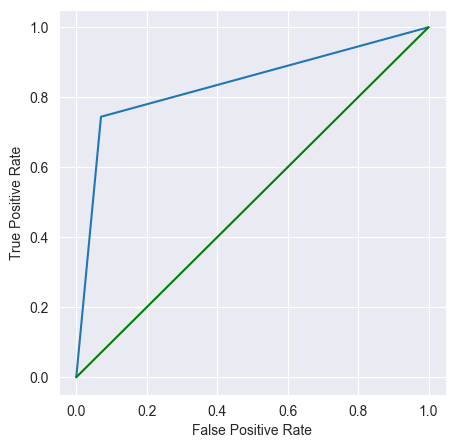

In [8]:
## 3. Постройте график ROC, определите значение AUC
## для примера смотрите ноутбук №3
from sklearn.metrics import RocCurveDisplay

fpr, tpr, _ = roc_curve(Y_true, Y_predicted_rnd)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
roc_display.figure_.set_size_inches(5,5)
plt.plot([0, 1], [0, 1], color = 'g')

auc = roc_auc_score(Y_true, Y_predicted_rnd)
print(auc)

Best values:
Threshold:  0.543 
AUC:  0.8486332109343125 
TPR:  [0.         0.74418605 1.        ] 
FPR:  [0.         0.07017544 1.        ]


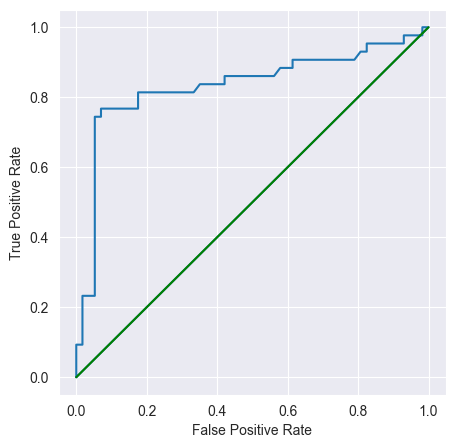

In [9]:
## * 4. Проверьте, можно ли улучшить качество предсказания метки класса? Верно ли подобрано пороговое значение?

def fpr_tpr_list(n, y_real, y_proba):
    tpr_list = [0]
    fpr_list = [0]
    auc_old = 0
    highest = 0, 0, 0, 0
    for i in range(n):
        _threshold = i/n
        y_pred = np.where(y_proba < _threshold, 0, 1)
        _tn, _fp, _fn, _tp = confusion_matrix(y_true=y_real, y_pred=y_pred).ravel()
        _tpr = _tp/(_tp+_fn)
        _fpr = 1-_tn/(_tn+_fp)
        tpr_list.append(_tpr)
        fpr_list.append(_fpr)
        auc_new = roc_auc_score(y_real, y_pred)
        if auc_old != auc_new:
            auc_old = auc_new
            _, auc_highest_old, _, _ = highest
            highest = (_threshold, auc_new, tpr, fpr) if auc_new > auc_highest_old else highest
    bt, ba, btpr, bfpr = highest
    print("Best values:\nThreshold: ", bt,
          "\nAUC: ", ba,
          "\nTPR: ", btpr,
          "\nFPR: ", bfpr)
    return fpr_list, tpr_list

fprl, tprl = fpr_tpr_list(n=1000, y_real=Y_true, y_proba=Y_predicted)

roc_display = RocCurveDisplay(fpr = fprl, tpr=tprl).plot()
roc_display.figure_.set_size_inches(5,5)
plt.plot([0, 1], [0, 1], color = 'g')

#### Вторая часть 

In [10]:
## Вам дан набор, в котором есть 200 объектов: 20 из класса 1 и 180 из класса 0
## Y   - истинные метки классов
## Yp1 - результаты предсказания алгоритма 1
## Yp2 - результаты предсказания алгоритма 2
## Yp3 - результаты предсказания алгоритма 3
## Yp4 - результаты предсказания алгоритма 4
np.random.seed(42)
Y =  np.hstack( [ np.ones(20), np.zeros(180) ] ) 
np.random.shuffle(Y)
Yp1 = make_errors(Y, 0.25, seed = 9)
Yp2 = make_errors(Y, 0.25, seed = 42)
Yp3 = make_errors(Y, 0.25, seed = 1024)
Yp4 = np.zeros(200)

In [11]:
## Определите accuracy каждого из методов
ypx = [Yp1, Yp2, Yp3, Yp4]

for yp in ypx:
    print(accuracy_score(y_true=Y, y_pred=yp))


0.75
0.75
0.75
0.9


In [12]:
## Какой из методов лучше?

## Судя по всему, более точен оказался YP4, который просто предполагает, что всё есть ноль.

In [13]:
## Повторите все для метрики F1

for yp in ypx:
    print(f1_score(y_true=Y, y_pred=yp))

## В среднем по палате (из определения про гармоническое среднее), FP2 считает лучше всех с упором на TP.
# F1 от FP4 = 0 потому что recall = 0, и в верхней части уравнения F1 получаем 0
# Можем убедиться - проверим recall FP4
print("FP4 recall ---", recall_score(y_true=Y, y_pred=Yp4))

0.3055555555555555
0.41860465116279066
0.375
0.0
FP4 recall --- 0.0


In [14]:
## Используйте результаты моделей №1-3 -- возьмем и усредним результаты их предсказаний:
Yc = ((Yp1 + Yp2 + Yp3)/3 > 0.5).astype(int)

In [15]:
## Оцените результат по метрикам Accuracy и F1, стал ли он лучше? Почему?
print(accuracy_score(y_true=Y, y_pred=Yc))
print(f1_score(y_true=Y, y_pred=Yc))

# При смешивании мы отсекаем часть ложноположительных/ложноотрицательных результатов, тем самым оставляя бОльшую долю корректных результатов.

0.875
0.5762711864406781


In [16]:
## Можете добавить к вычислению консенсуса результат Yp4. Определите метрики Accuracy и F1. Что изменилось?
Yc_add4 = ((Yp1 + Yp2 + Yp3 + Yp4)/4 > 0.5).astype(int)
print(accuracy_score(y_true=Y, y_pred=Yc_add4))
print(f1_score(y_true=Y, y_pred=Yc_add4))

# Вливание нулей по факту ничего не поменяло, кроме итогового деления на 4, а не на 3. У нас просто опустился трешхолд пропуска, и мы отсекли еще больше значений.

0.925
0.5161290322580645


In [17]:
## Какой вывод вы можете сделать из данного упражнения?

# Имея несколько неточных алгоритмов, можно их попробовать просуммировать (что и есть композиция/ансамбль), мб что и получится в итоге, если они дают fp fn значения не на одинаковых "зонах"

### 2. Исследование корреляций (1 балл).

В вашем распоряжении оказался некий датасет (наблюдения за экспрессией некоторых генов, рекомендательная база данных для ассортимента интернет-маркета, относительный расход электричества в домах в некотором городе и т.д.). Вам необходимо:

1. Посмотреть корреляцию датасета с целевой переменной. Есть ли такие признаки, абсолютное значение коэффициента корреляции для которых > 0.5?
2. Посмотреть корреляцию между признаками внутри датасета. Какое распределение у абсолютных значений коэффициентов корреляции Пирсона для первого признака? Много ли там признаков, абсолютное значение коэффициента корреляции для которых > 0.5?
3. Увеличить/уменьшить количество наблюдений N = 10, N = 100
4. Уменьшить количество признаков в данных: D = 100, 500, 5000
5. Дать ответы на вопросы:
    - Чем обусловлены наши проблемы с этим набором данных? 
    - Как можно бороться со случайными корреляциями?
    - Почему при тестировании нескольких статистических гипотез необходимо проводить поправку на множественную проверку гипотез?

In [18]:
np.random.seed(42)

N = 30    ## количество наблюдений
D = 10000 ## размерность наших данных -- например, число некоторых генов, экспрессию которых мы изучаем

def generate_xy(N, D):
    _Y = pd.Series(np.random.normal(0, 1, N)) ## это какие-то наши целевые значения
    _X = pd.DataFrame( np.random.normal(0, 1, (N, D)) ) ## это наши независимые переменные, скажем экспрессия некоторых генов
    return _X, _Y

col_filter = lambda col: col.loc[lambda x : abs(x) > 0.5].sort_values(ascending=False)

X, Y = generate_xy(N, D)
## как мы видим все эти данные абсолютно случайные...

6748    0.650175
355     0.641488
6035    0.593701
8955    0.564493
4278    0.562249
          ...   
2705   -0.573870
1593   -0.577785
691    -0.600071
9841   -0.621939
300    -0.653086
Length: 61, dtype: float64


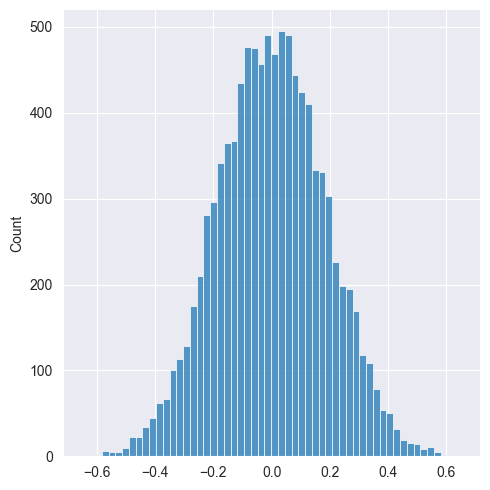

In [19]:
## можем ли мы получить высокую корреляцию с нашей целевой переменной?
ccY = X.corrwith(Y)
## посмотрите на распределение значений. Есть ли такие "гены", абсолютное значение коэффициента корреляции для которых > 0.5
sns.displot(data=ccY)

print(col_filter(ccY))

7105    0.659117
7119    0.614717
6629    0.608451
8839    0.577545
1521    0.576797
1399    0.554175
8299    0.548434
7322    0.530988
1484    0.520587
2313    0.520582
496     0.519495
5783    0.519420
8637    0.518106
7334    0.512481
9397    0.511029
2916    0.509382
4136    0.506732
3121    0.506425
5167    0.502925
2513    0.500484
2297   -0.506652
6704   -0.506781
8065   -0.511038
8722   -0.513217
984    -0.515107
1586   -0.518212
1716   -0.518309
6486   -0.518423
3393   -0.518806
8446   -0.520349
4282   -0.521409
7978   -0.526462
7451   -0.529288
2960   -0.530043
1475   -0.532659
5627   -0.541334
6546   -0.542719
8930   -0.546740
7090   -0.550971
6294   -0.552567
8385   -0.553075
1023   -0.554383
4611   -0.563301
2528   -0.570054
1719   -0.571093
6983   -0.571601
7427   -0.576307
5101   -0.593555
9006   -0.598799
1655   -0.635552
6669   -0.685885
7854   -0.729853
Name: 0, dtype: float64


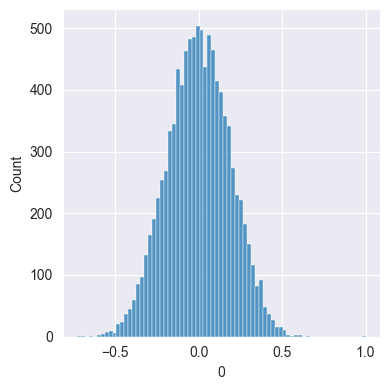

In [20]:
## теперь давайте проведем аналогичный эксперимент для нашей матрицы X... 
## определим "коэкспрессию" ...
ccX = X.corr()

#У меня компьюктер не выдерживает 10000*10000 значений (на картинке ниже пояснение), поэтому я пожалуй просто оценю первую колонку (видимо это надо было сделать в следующем задании...)
print(col_filter(ccX.iloc[0,1:]))
sns.displot(data=ccX[0], height=4)

![img1](hwfiles/img.png)

In [21]:
## Посмотрите на респределение абсолютных значений коэффициентов корреляции Пирсона
## Например для первого гена из нашего массива данных:
first_col_ccX = ccX.iloc[0,1:]
## много ли получилось генов с коэфф. корреляции > 0.5?
col_filter(first_col_ccX).count()

52

In [22]:
## Попробуйте увеличить/уменьшить количество наблюдений N = 10, N = 100

In [23]:
## Попробуйте использовать меньшее количество переменных: D = 100, 500, 5000


for n in [10, 30, 100]:
    print(f"\n########### N-{n} ###########\n")
    for d in [100, 500, 5000, 10000]:
        print(f"--- D-{d} ---")
        X, Y = generate_xy(N=n, D=d)
        ccX_nd = X.corr()
        ccY_nd = X.corrwith(Y)
        print(f"x-y: ", col_filter(ccY_nd).count())
        print(f"x-x[0]: ", col_filter(ccX_nd.iloc[0,1:]).count())

# С увеличением количества экспериментов, случайная корреляция теряется.
# С увеличением количества переменных, шанс нахождения корреляции поднимается.


########### N-10 ###########

--- D-100 ---
x-y:  15
x-x[0]:  10
--- D-500 ---
x-y:  67
x-x[0]:  77
--- D-5000 ---
x-y:  698
x-x[0]:  690
--- D-10000 ---
x-y:  1436
x-x[0]:  1400

########### N-30 ###########

--- D-100 ---
x-y:  2
x-x[0]:  1
--- D-500 ---
x-y:  4
x-x[0]:  0
--- D-5000 ---
x-y:  20
x-x[0]:  30
--- D-10000 ---
x-y:  57
x-x[0]:  50

########### N-100 ###########

--- D-100 ---
x-y:  0
x-x[0]:  0
--- D-500 ---
x-y:  0
x-x[0]:  0
--- D-5000 ---
x-y:  0
x-x[0]:  0
--- D-10000 ---
x-y:  0
x-x[0]:  0


In [24]:
## Чем обусловлены наши проблемы с этим набором данных? Как можно бороться со случайными корреляциями?

# Проблема - данные абсолютно случайны, корреляций в них физически не Должно быть.
# Бороться путем увеличения количества изначальных данных. Чем больше переменных, тем больше данных должно быть.

In [25]:
## Почему при тестировании нескольких статистических гипотез необходимо проводить поправку на множественную проверку гипотез?

# Мы должны учитывать ошибки первого рода?

Тем, для кого выражение "p-hacking" незнакомо -- обязательно смотреть статьи: 
* https://en.wikipedia.org/wiki/Data_dredging
* https://ru.wikipedia.org/wiki/Поправка_на_множественную_проверку_гипотез
* http://www.machinelearning.ru/wiki/index.php?title=Множественная_проверка_гипотез

Для развлечения:  
http://www.tylervigen.com/spurious-correlations

### 3. Полиномиальная регрессия (1 балл).

Вам предлагается самим поэксперементировать с построением полиномиальной регрессией, способной приблизить функцию **myy**. Постройте модели для нескольких степеней (1, 2, 4, 15) и определите среднеквадратичную ошибку предсказания. Какая модель является на ваш взгляд оптимальной? Почему? С какими проблемами мы столкнулись при построении моделей (что иллюстрирует этот эксперимент)?

In [26]:
from sklearn import linear_model as lm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [27]:
def myy(x):
    return np.cos(1.5 * np.pi * x)

def poly_lm(X,y, dg):
    polynomial_features = PolynomialFeatures(degree=dg,
                                             include_bias=False)
    linear_regression = lm.LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    return pipeline

np.random.seed(0)
Xx = np.random.rand(70) ## набор тренировочных данных X
y = myy(Xx) + np.random.randn(70) * 0.1 ## набор истинных значений y для тренировочного набора

X_test = np.linspace(-.01, 1.01, 30)  ## набор тестовых данных X
y_test = myy(X_test) ## набор истинных значений y для тестового набора

0.21825093272660684
0.20088202759770452


/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


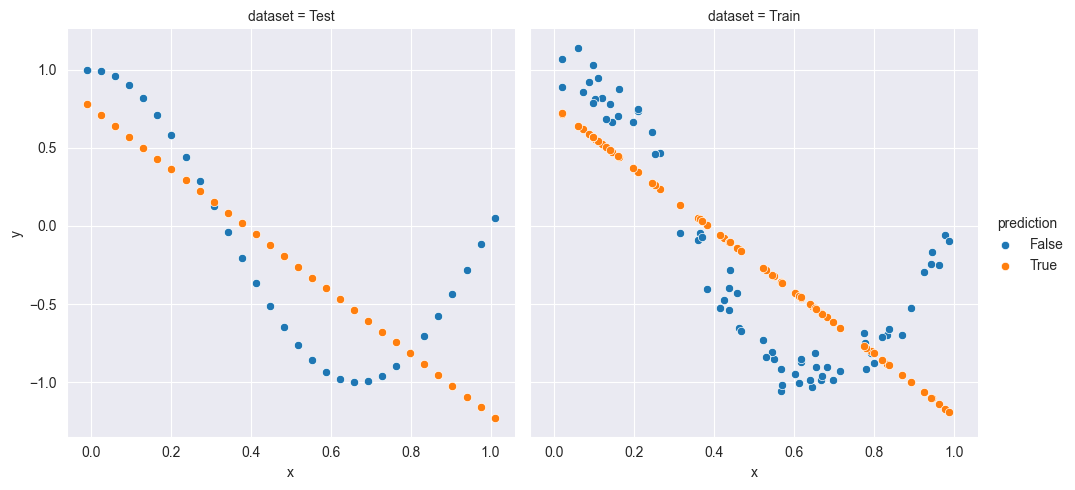

In [28]:
## получим модель для степени = 1, 2, 4, 15
mod1 = poly_lm(Xx, y, dg = 1)

xydf = lambda x, y, dataset, prediction, degree: pd.DataFrame(data={
    'x': x,
    'y': y,
    'dataset': dataset,
    'prediction': prediction,
    'degree': degree
})

test_def_make = lambda degree: xydf(x=X_test, y=y_test, dataset="Test", prediction=False, degree=degree)
train_def_make = lambda degree: xydf(x=Xx, y=y, dataset="Train", prediction=False, degree=degree)

test = test_def_make(1)
train = train_def_make(1)

## определите среднеквадратичную ошибку предсказания для тестового набора и для тренировочного набора
## выполним предсказание для тестового набора
y_test_pred1 = mod1.predict(X_test[:, np.newaxis])
pred_test1 = xydf(x=X_test, y=y_test_pred1, dataset="Test", prediction=True, degree=1)
print(metrics.mean_squared_error(y_test, y_test_pred1))

y_train_pred1 = mod1.predict(Xx[:, np.newaxis])
pred_train1 = xydf(x=Xx, y=y_train_pred1, dataset="Train", prediction=True, degree=1)
print(metrics.mean_squared_error(y, y_train_pred1))

datapack = pd.concat([test, train, pred_test1, pred_train1])
g = sns.FacetGrid(
    data=datapack,
    hue="prediction",
    col="dataset",
    height=5
)
g.map(sns.scatterplot, "x", "y")
g.add_legend()

Test  on 1-degree MSE:  0.21825093272660684
Train  on 1-degree MSE:  0.20088202759770452
Test  on 2-degree MSE:  0.04580414819512723
Train  on 2-degree MSE:  0.038190995479702304
Test  on 3-degree MSE:  0.005377089195302288
Train  on 3-degree MSE:  0.014133856778662052
Test  on 4-degree MSE:  0.0015112578609073766
Train  on 4-degree MSE:  0.00949039940191646
Test  on 5-degree MSE:  0.0011035408926883415
Train  on 5-degree MSE:  0.009395299971021048
Test  on 6-degree MSE:  0.0022496035809582244
Train  on 6-degree MSE:  0.008596434252001656
Test  on 7-degree MSE:  0.0028173490946441183
Train  on 7-degree MSE:  0.0084317139986383
Test  on 8-degree MSE:  0.002744603860459799
Train  on 8-degree MSE:  0.008183066713576565
Test  on 9-degree MSE:  0.0028336196572908566
Train  on 9-degree MSE:  0.008142799791060935
Test  on 10-degree MSE:  0.03363407433391171
Train  on 10-degree MSE:  0.007516723912973319
Test  on 11-degree MSE:  0.1080359254232476
Train  on 11-degree MSE:  0.007068319904065258

/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be r

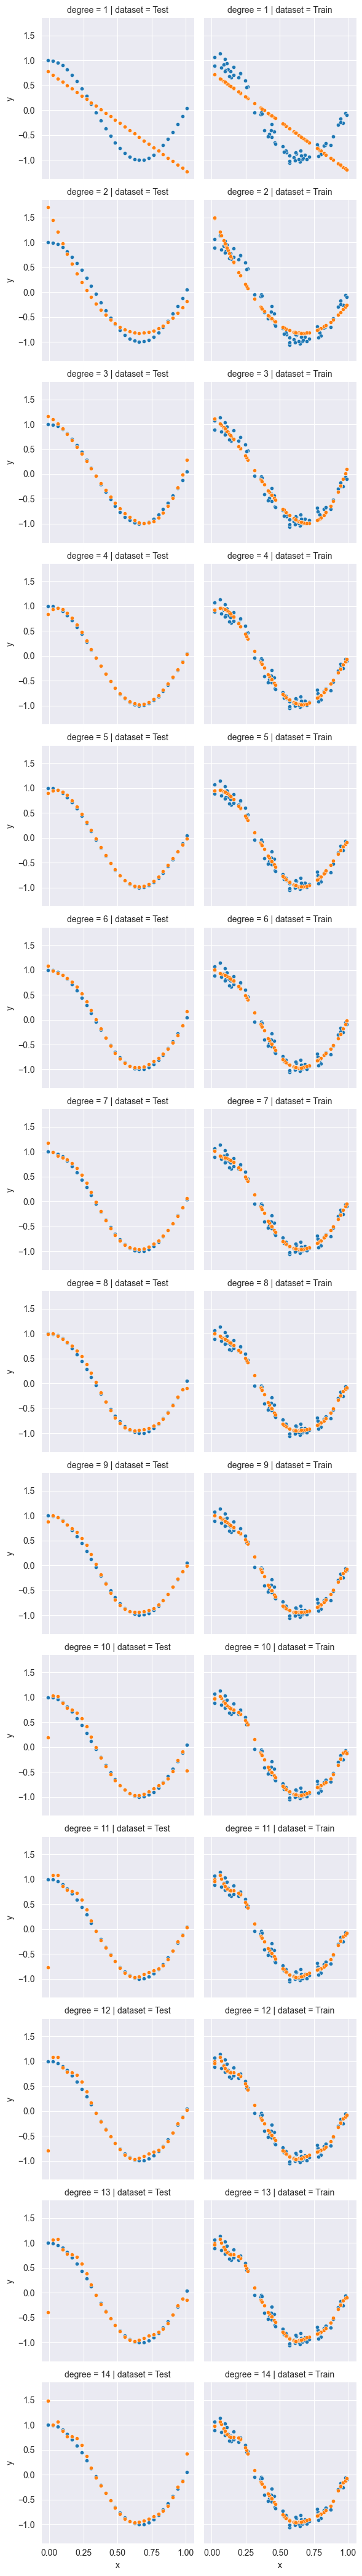

In [29]:
## аналогично поступите для степени 2, 4 и 15
datapack = pd.concat([test, train])
bestResult = 1, 1


for i in range(1, 15):
    mod = poly_lm(Xx, y, dg = i)
    calcResult = 1
    for pred_set in [
        (X_test, y_test, "Test"),
        (Xx, y, "Train")
    ]:
        pred_data, compare_data, dataset = pred_set
        y_pred = mod.predict(pred_data[:, np.newaxis])
        y_pred_xy = xydf(x=pred_data, y=y_pred, dataset=dataset, prediction=True, degree=i)
        datapack = pd.concat([datapack, y_pred_xy, test_def_make(i), train_def_make(i)])
        mse = metrics.mean_squared_error(y_true=compare_data, y_pred=y_pred)
        print(dataset, f" on {i}-degree MSE: ", mse)
        calcResult *= mse
    calcOld, deg = bestResult
    bestResult = (calcResult, i) if calcResult < calcOld else bestResult

print(f"\n-------------\n BEST RESULT - on {bestResult[1]} degree")
g = sns.FacetGrid(
    data=datapack,
    hue="prediction",
    col="dataset",
    row="degree",
    height=3
)
g.map(sns.scatterplot, "x", "y", s=20)

In [30]:
## Какая модель является на ваш взгляд оптимальной? Почему? С какими проблемами мы столкнулись при построении моделей?

# Судя по результатам MSE - лучшей является модель с полиномиальными фичами пятой степени. Будет минимальная ошибка на трейне и тесте. Все что выше - очень сильно оверфитит.
# Честно - не знаю как оценивать проблемы, с которыми я столкнулся... Предполагаю, что подбор и оценка степени возможно может быть проблемой. Полиномиальные фичи очень быстро оверфитят, возможно тоже проблема. В документации рекомендовано не использовать степень больше 4.

### 4. Шкалирование данных (2 балла).

Для этого задания часть датасетов генерируется в коде, часть - приложена в виде файла к вашему ДЗ. Необходимо ответить на следующие вопросы:
1. Зачем нужно проводить шкалирование данных? 
2. Всегда ли это нужно делать?
3. Какой/какие из предоставленных вам наборов надо шкалировать? Обоснуйте свой ответ при помощи кода.

In [31]:
X1, Y1 = make_classification(n_samples=500, n_features=50, 
                             n_informative=20, n_redundant=10, 
                             n_repeated=0, n_classes=3, 
                             n_clusters_per_class=1, 
                             weights=None, # The proportions of samples assigned to each class. 
                                           # If None, then classes are balanced.
                             flip_y=0.01, class_sep=1.0, 
                             hypercube=True,
                             shift=1.0, 
                             scale=None, 
                             shuffle = False,
                             random_state=42)

X2, Y2 = make_classification(n_samples=500, n_features=50, 
                             n_informative=20, n_redundant=10, 
                             n_repeated=0, n_classes=3, 
                             n_clusters_per_class=1, 
                             weights=None, # The proportions of samples assigned to each class. 
                                           # If None, then classes are balanced.
                             flip_y=0.01, class_sep=1.0, 
                             hypercube=True,
                             shift=1.0, 
                             scale=1, 
                             shuffle = False,
                             random_state=42)

XY3 = pd.read_csv('hwfiles/X3.csv')
X3, Y3 = XY3.iloc[:,1:], XY3.Y

In [1]:
pdx1 = pd.DataFrame(data=X1)
# pdx1['class'] = Y1
pdx2 = pd.DataFrame(data=X2)
# pdx2['class'] = Y2
pdxs1 = pd.DataFrame(data=StandardScaler().fit_transform(pdx1.astype('float64')))
pdxs2 = pd.DataFrame(data=StandardScaler().fit_transform(pdx2.astype('float64')))

pdx1.boxplot(figsize=(10, 7))
# где-то здесь я подумал, что pairplot на 50 фич это хорошая затея........

# Зачем шкалировать? Диапазон значений наших данных может крайне сильно отличаться. Из-за этого, на всех алгоритмах, вычисляющих "расстояние" между датапоинтами, будут заметны эти разбросы в расстояниях, и может меняться вес компонент.

# Всегда ли надо делать? Нет не всегда. Необходимо для алгоритмов, считающих расстояние: KNN, PCA. В алгоритмы наивного байесовского классификатора и линейного дискриминанта уже по факту "встроен" функционал шкалирвоания. Мы можем ускорить работу градиентного спуска при помощи шкалирования. Спуск замедляется на больших значениях. Для древовидных моделей без разницы, шкалированные данные или нет, они не измеряют расстояния и могут принимать любое ранжирование

# Какие данные мы должны отшкалировать?
# X1 (достаточно глянуть на боксплот разбросов).
# Х2 тоже надо
# Х3 по факту бинарные данные, они не подвергаются шкалированию (наверное...)

NameError: name 'pd' is not defined

<AxesSubplot: >

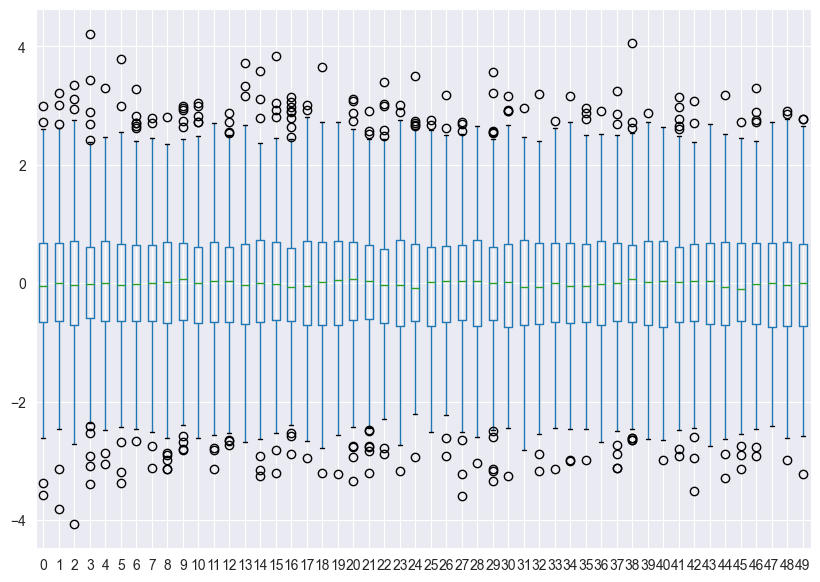

In [33]:
pdxs2.boxplot(figsize=(10, 7))

<AxesSubplot: >

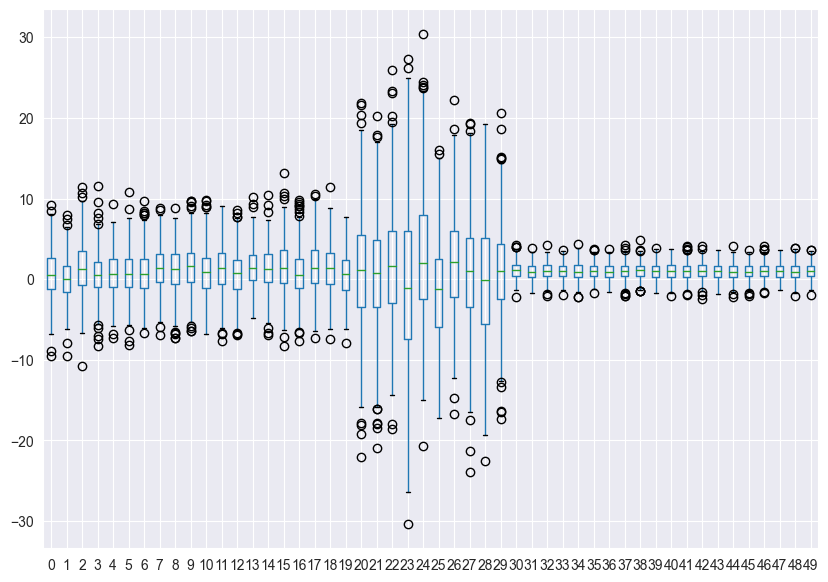

In [34]:
pdx2.boxplot(figsize=(10, 7))

<AxesSubplot: >

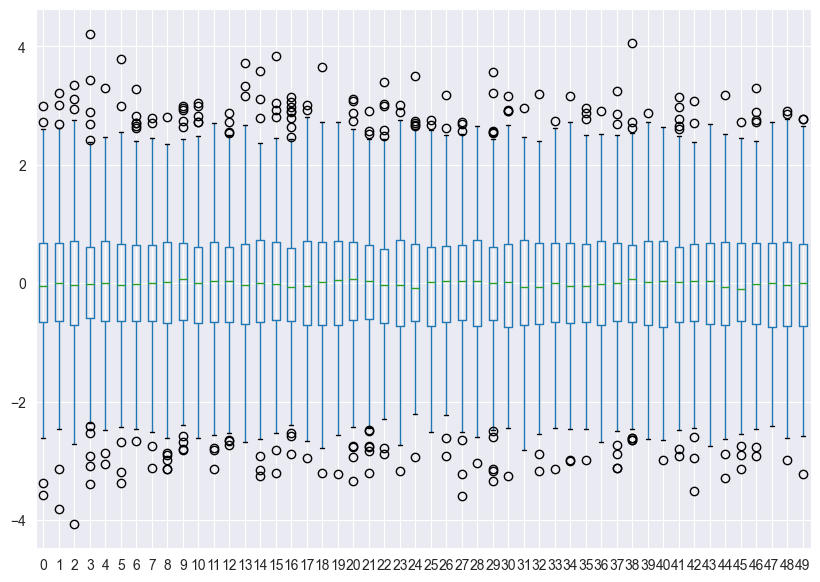

In [35]:
pdxs2.boxplot(figsize=(10, 7))

<AxesSubplot: >

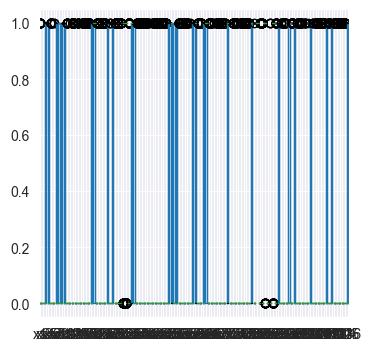

In [36]:
X3.boxplot(figsize=(4, 4)) # Тут и так все понятно, бинарные данные

### 5. Нестандартные данные (2 балла).

Вам дан набор неразмеченных данных X4. Проведите его анализ с помощью PCA, визуализируйте результат. Какие выводы вы можете сделать? Чем может быть обусловлена такая картина? Как стоит поступить? Можете сразу проверить свою гипотезу.

In [37]:
X4 = pd.read_csv('hwfiles/X4.csv')

[0.49819373 0.17202054 0.11344479 0.0998771  0.06449646 0.02631199
 0.01599128 0.00627832 0.00245867 0.00092711]
10
[0.49819373 0.17202054 0.11344479]


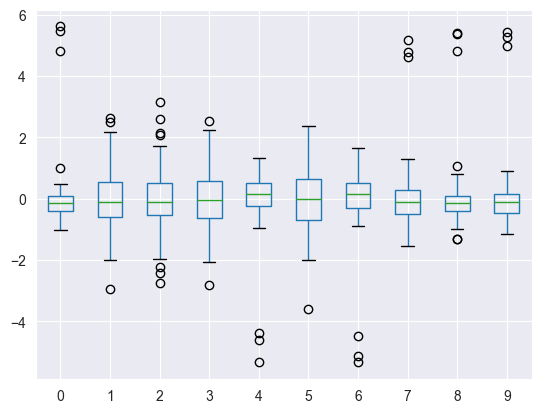

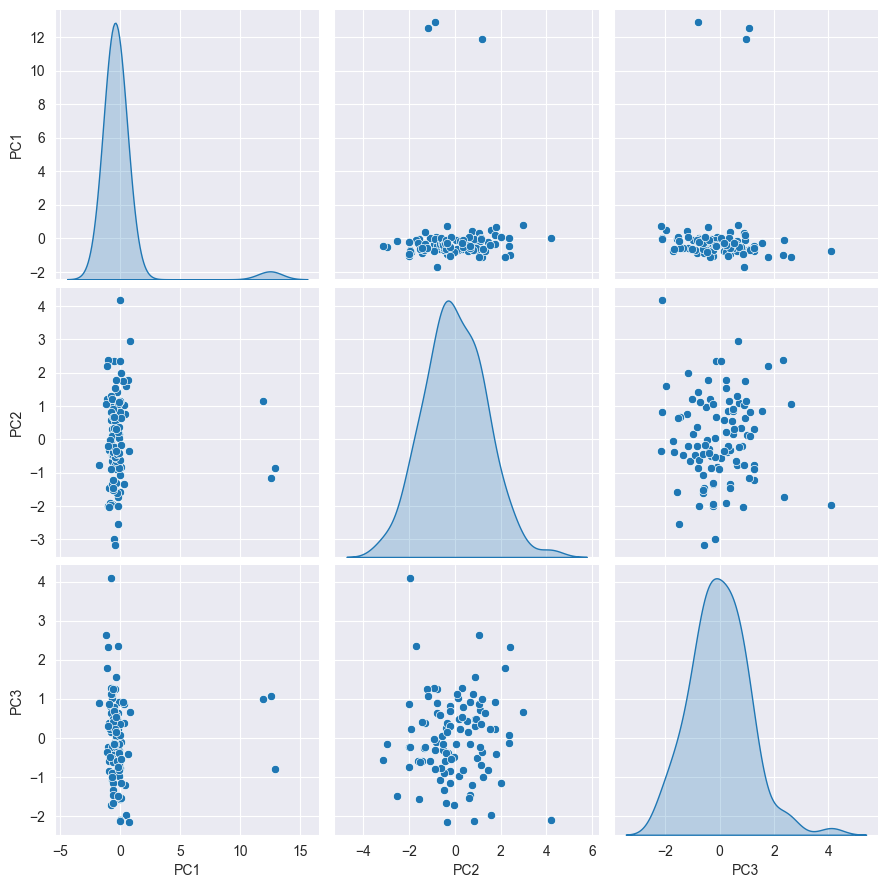

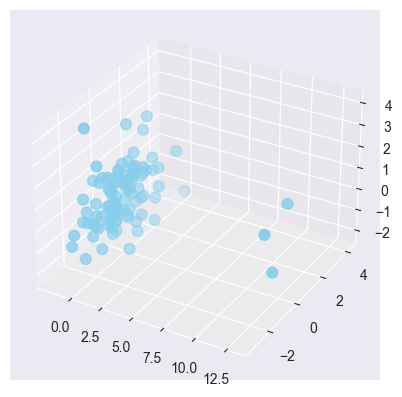

In [38]:
xs4 = pd.DataFrame(data=StandardScaler().fit_transform(X4.astype('float64'))) #для PCA необходимо шкалирование
xs4.boxplot() # наблюдаются значительные выбросы

## Проведите его анализ с помощью PCA.

pcae2 = PCA() # На пустом PCA предлагает 10 компонент. Если мы рассматривам хоть немного значимый порог в 0.01, то берем 3 компоненты
e_comp = pd.DataFrame(pcae2.fit_transform(xs4))
print(pcae2.explained_variance_ratio_)
print(pcae2.n_components_)

pca2 = PCA(n_components=3)
comp = pd.DataFrame(pca2.fit_transform(xs4),  columns = ['PC1', 'PC2', 'PC3'])
print(pca2.explained_variance_ratio_)

## Визуализируйте результат.

sns.pairplot(data=comp, diag_kind = 'kde', diag_kws=dict(fill=True), height = 3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(comp.PC1, comp.PC2, comp.PC3, c='skyblue', s=60)
plt.show()

#В теории можно было еще график со стрелочками "влияния на компоненты" сделать.

In [39]:
## Какие выводы вы можете сделать? Чем может быть обусловлена такая картина? Как стоит поступить?

## Выводы - 2 варианты событий - либо данные неразделимы, либо данных недостаточно. Наблюдаются выбросы, которые могут быть отдельным классом.
# Чем обусловлена? Недостаточностью данных, либо их однородностью.
# Как поступить? Набрать еще данных, в приоритете собирать только "уникальные" - выделяющиеся из этой однородности.

### 6. Нестандартные данные - 2 (бонусное на 1 балл).

Здесь мы наглядно познакомимся с тем, что такое серийные эффекты (batch effect). 
Вам дан набор данных 'expr_data.tsv'. 
1. Какая переменная в вашем наборе данных указывает на возможное присутствие серийных эффектов? С чем могут быть связаны серийные эффекты?
2. Ваша задача попытаться найти маркерные признаки. Имеет ли ваша задача решение?
3. Какие проблемы вы заметили в данных? Можно ли с ними бороться? Имеет ли это смысл в данном случае?

In [40]:
ED = pd.read_csv('hwfiles/expr_data.tsv', sep='\t')

In molecular biology, a batch effect occurs when non-biological factors in an experiment cause changes in the data produced by the experiment. Such effects can lead to inaccurate conclusions when their causes are correlated with one or more outcomes of interest in an experiment. They are common in many types of high-throughput sequencing experiments, including those using microarrays, mass spectrometers, and single-cell RNA-sequencing data. They are most commonly discussed in the context of genomics and high-throughput sequencing research, but they exist in other fields of science as well.

In [41]:
#Думал, что вероятно будет появляться зависимость из-за батчэффекта, но, честно не могу приложить ума как 1к генов анализировать. На русском ничего нет, а на английском не то чтобы сильно могу вникнуть. (ниже статейки, возможно вернусь чуть позже к этому)

# https://evayiwenwang.github.io/Managing_batch_effects/detect.html
# https://rnabio.org/module-03-expression/0003/05/01/Batch-Correction/

#Есть рекомендации через PCA анализировать батч

# corr_table = ED.iloc[:,4:].corr()
# sns.heatmap(data=corr_table)
# corr_table.Gene1.loc[lambda x : abs(x) > 0.3].sort_values(ascending=False)

![](hwfiles/img_1.png)